# Cambio1.0

### Overview
Here we'll put together a working climate model based on carbon mass balance involving the atmosphere, land, and the oceans. Here's our model:

$$
F_{land->atm} =  k_{la} \ \ \ (1) 
$$

$$
F_{atm->land} = k_{al0} +  k_{al1} [C_{atm}] \ \ \ (2)
$$

$$
F_{ocean->atm} = k_{oa} [C_{ocean}] \ \ \ (3)
$$

$$
F_{atm->ocean} = k_{ao} [C_{atm}] \ \ \ (4)
$$

$$
F_{human->atm} = \epsilon(t) \ \ \ (5)
$$

### Euler's method
As previously, we'll solve this problem by setting up a *for loop* in which we need to update our reservoir amounts of carbon using Python's "+=" construct. What's different here is that we'll be tracking the concentration of carbon in the *ocean* reservoir, as well as the atmospheric reservoir:

$$
\Delta [C_{atm}] = (F_{land->atm}+F_{ocean->atm}+F_{human->atm}-F_{atm->land}-F_{atm->ocean}) \times \Delta t \ \ \ (6)
$$

$$
\Delta [C_{ocean}] = (F_{atm->ocean}-F_{ocean->atm}) \times \Delta t \ \ \ (7)
$$

Also as previously, you'll need to set things up by copying your emission scenario file into the Cambio1.0 folder.


### Skills and insghts

1. I can set up and numerically solve coupled ordinary differential equations describing the carbon mass balance between the atmosphere, land, and oceans.
1. I have a sense of the % of annual anthropogenic emissions that are absorbed by the oceans and the land at present, and of when the ocean will stop being a sink and start to become a net source of $CO_2$ to the atmosphere. 
1. I have a sense of the delay between the *timing of peak anthropogenic emissions* and *the timing of maximum atmospheric $CO_2$*, and of the reason behind that delay.
1. I can translate between carbon amounts in the atmosphere from GtC to ppm, and back.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5io

In [2]:
%matplotlib notebook

### Reading in the scheduled emission scenario
In the cell below, read in your scheduled emissions scenario (from ScheduledFlows). You should also plot the scenario to make sure the data are good and what you expected.

{'dataframe':             time     emissions
 0     1750.00000  1.582627e-02
 1     1750.10002  1.586589e-02
 2     1750.20004  1.590561e-02
 3     1750.30006  1.594543e-02
 4     1750.40008  1.598536e-02
 ...          ...           ...
 4995  2249.59992  9.335894e-11
 4996  2249.69994  9.172082e-11
 4997  2249.79996  9.101219e-11
 4998  2249.89998  8.935881e-11
 4999  2250.00000  8.863956e-11
 
 [5000 rows x 2 columns],
 'delta_t_trans': 20,
 'emission units': 'GtC/year',
 'eps_0': 12.4,
 'k': 0.025,
 't_0': 2018,
 't_trans': 2040}

<IPython.core.display.Javascript object>


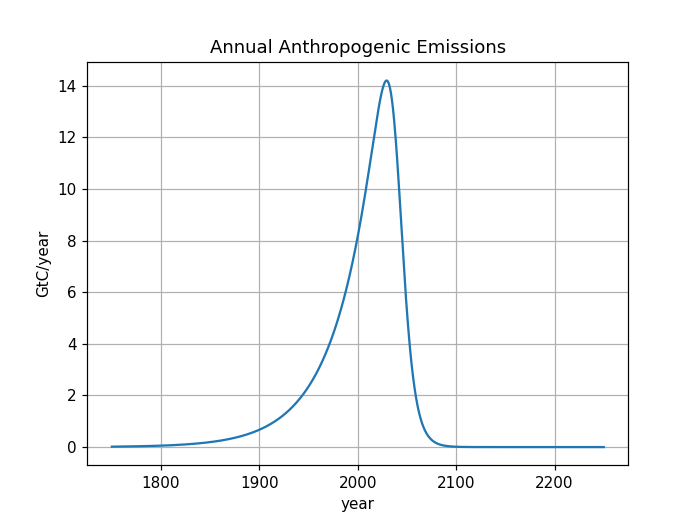

Text(0, 0.5, 'GtC/year')

In [3]:
## BEGIN SOLUTION
# Name of the file
filename = '../Week_05a.ScheduledFlows/Peaks_in_2030.hdf5'

# This loads the stored dictionary
epsdictionary_fromfile = h5io.read_hdf5(filename)

# This shows what's in the dictionary
display(epsdictionary_fromfile)

# This extracts the dataframe from the dictionary
epsdf = epsdictionary_fromfile['dataframe']

# This extracts the time and emissions from the dataframe
time = np.array(epsdf['time'])
eps = np.array(epsdf['emissions'])

plt.figure()
plt.plot(time,eps)
plt.grid(True)
plt.title('Annual Anthropogenic Emissions')
plt.xlabel('year')
plt.ylabel('GtC/year')
### END SOLUTION

### Rate constants and initial conditions
In the cell below, we'll get started with the time step, which you can get from the difference between the first two elements of your $t$ array. You'll also need to specify the 1st order rate constants, as follows:

    k_la = 120
    k_al0 = 113 
    k_al1 = 0.0114
    k_oa = 0.2
    k_ao = 0.114

In [4]:
# Specify rate constants
### BEGIN SOLUTION

C_atm = 615
C_ocean = 350

k_la = 120; print("k_la =", k_la)
k_lap = 7
k_al0 = k_la-k_lap; print("k_al0 =", k_al0)

k_al1 = k_lap/C_atm; print("k_al1 =", k_al1)
k_al1 = 0.0114; print("k_al1 (revised) =", k_al1)

k_oa = 0.2; print("k_oa =", k_oa)
k_ao = k_oa/615*C_ocean; print("k_ao =", k_ao)
k_ao = 0.114; print("k_ao (revised) =", k_ao)
### END SOLUTION

# Calculate the time step
### BEGIN SOLUTION
dt = time[1]-time[0]
### END SOLUTION

k_la = 120
k_al0 = 113
k_al1 = 0.011382113821138212
k_al1 (revised) = 0.0114
k_oa = 0.2
k_ao = 0.11382113821138211
k_ao (revised) = 0.114


### Solving the model using Euler's method
Your challenge is to solve the model laid out in Eqs. (1-5) using Euler's method, using the algorithms laid out in Eqs. (6-7). The time frame should be the times embedded in your anthropogenic emissions model. You should also specify the starting concentrations of carbon in the atmosphere, as

    C_atm = 615
    C_ocean = 350

After you have done that, you should provide some kind of graphical output. We've done one window for you, $[C_{atm}]$ and $[C_{ocean}]$, in GtC. In a second graphics window, plot $[C_{atm}]$ again, but this time in ppm. In a third graphics window, plot the following:

- The anthopogenic flux, $\epsilon(t)$
- The net land-to-atmosphere flux, $F_{land->atm}-F_{atm->land}$ 
- The net ocean-to-atmosphere flux, $F_{ocean->atm}-F_{atm->ocean}$

Annotate all these graphs using the label/legend method. 

<IPython.core.display.Javascript object>


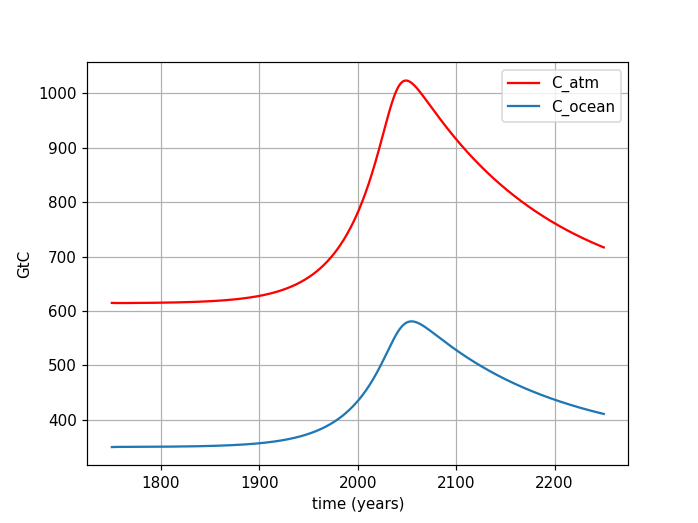

<IPython.core.display.Javascript object>


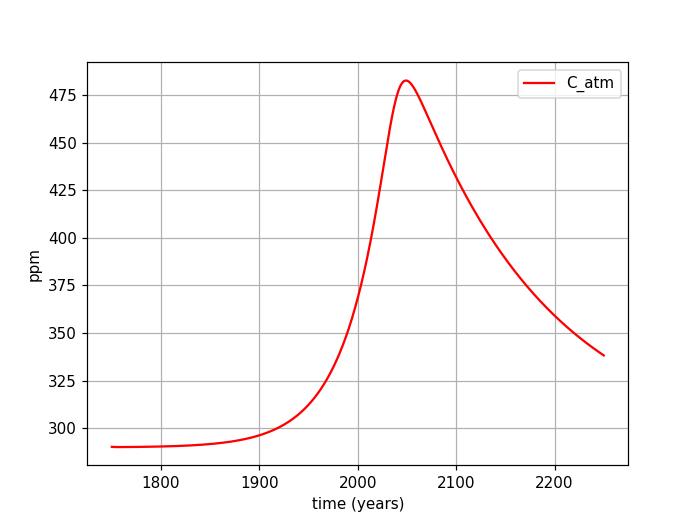

<IPython.core.display.Javascript object>


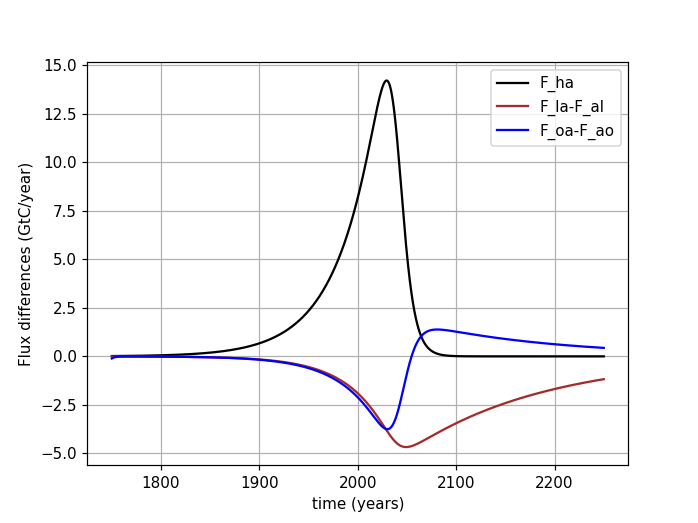

In [5]:
# This initializes empty numpy arrays that will hold the atmospheric & oceanic carbon amounts and fluxes over time
C_atm_array = np.empty(0)
C_ocean_array = np.empty(0)
F_la_array = np.empty(0)
F_al_array = np.empty(0)
F_ao_array = np.empty(0)
F_oa_array = np.empty(0)

# Now specify reservoir amounts in the atmosphere (C_atm) and oceans (C_ocean), in GtC. 
### BEGIN SOLUTION
C_atm = 615
C_ocean = 350
### END SOLUTION

# Loop over time and use Euler's method to update, saving as you go
### BEGIN SOLUTION
for i in range(len(time)):
    
    # This calculates the fluxes of this iteration of the loop
    F_al = k_al0 + k_al1*C_atm
    F_la = k_la
    F_oa = k_oa*C_ocean
    F_ao = k_ao*C_atm
    
    # This calculates the change in C_atm and C_ocean
    delta_C_atm = (F_la + F_oa - F_ao - F_al + eps[i])*dt
    delta_C_ocean = (F_ao - F_oa)*dt
    
    # Get the new C_atm and C_ocean
    C_atm += delta_C_atm
    C_ocean += delta_C_ocean
    
    # Append to arrays
    C_atm_array = np.append(C_atm_array,C_atm)
    C_ocean_array = np.append(C_ocean_array,C_ocean)
    F_la_array = np.append(F_la_array,F_la)
    F_al_array = np.append(F_al_array,F_al)
    F_oa_array = np.append(F_oa_array,F_oa)
    F_ao_array = np.append(F_ao_array,F_ao)
### END SOLUTION

# Plotting the concentrations (C_atm and C_ocean) on one graph, in GtC
plt.figure('Carbon in the atmosphere and oceans')
plt.plot(time,C_atm_array,'red',label='C_atm')
plt.plot(time,C_ocean_array,label='C_ocean')
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel("GtC")
plt.legend()

# Plot the atmospheric concentration (C_atm), in ppm (by dividing C_atm by 2.12)
plt.figure('Carbon in the atmosphere converted to ppm')
### BEGIN SOLUTION
plt.plot(time,C_atm_array/2.12,'red',label='C_atm')
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel("ppm")
plt.legend()
### END SOLUTION

# Plot the net fluxes
plt.figure('Net fluxes (into - out of atmosphere) and anthropogenic input to atmosphere (GtC/year)')
### BEGIN SOLUTION
F_land_net = F_la_array-F_al_array
F_ocean_net = F_oa_array-F_ao_array
F_impact = eps +F_land_net +F_ocean_net
plt.plot(time,eps,label='F_ha',color='black')
plt.plot(time,F_land_net,label='F_la-F_al',color='brown')
plt.plot(time,F_ocean_net,label='F_oa-F_ao',color='blue')
# plt.plot(time,F_impact,label='bathtub flux',color='red')
plt.grid(True)
plt.xlabel('time (years)')
plt.ylabel("Flux differences (GtC/year)")
plt.legend()
### END SOLUTION

### Pause for analyis
In the cell below, do a little analysis of your results:

1. Based on visual inspection of your "Net fluxes" graph, estimate the % of anthropogenic emissions in the year 2022 that will be absorbed by land, and the % that will be absorbed by oceans. Also, in approximately what year will the ocean will start to become a net source of $CO_2$ to the atmosphere?
1. You'll notice that the timing of maximum atmospheric $CO_2$ concentration is delayed a few years after the timing of maximum anthropogenic *emissions*. How many years is this delay? Also, what is the atmospheric concentrtion of $CO_2$ at the year of maximum concentration? (You'll need to use the concentration plot in ppm to make this estimate.)
1. Have a look at https://en.wikipedia.org/wiki/Shared_Socioeconomic_Pathways, and identify the SSP scenario that best matches your results. There's no unique answer to this, by the way, because there are timing issues and concentration issues. 

### BEGIN SOLUTION

These are for the scheduled flow that has peak anthropogenic emissions in 2030:
1. It's about 25% for each. Looks like about the year 2055, oceans will become a net source..
1. Atmospheric concentration peaks 10 years after, at about 480 ppm. 
1. Seems to be closest to SSP2-4.5 in terms of maximum $CO_2$ concentration, although ours is a peak and SSP2 keeps going up. 

### END SOLUTION

### Refresh/save/validate
Double-check everything is OK, and press the "Validate" button (as usual).

### Close/submit/logout
Close, submit, and log out.